<a href="https://colab.research.google.com/github/Chathuwa99/Chathuwa99/blob/main/Bank_Deposit_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#create data drame to read data set
data_set = pd.read_csv('/content/cleaned_bank_dataset.csv')

In [ ]:
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data_set.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# find number of rows and column
data_set.shape

(45211, 17)

In [ ]:
print("Columns in the dataset:")
print(data_set.columns)

Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [ ]:
# describe df numerical columns
data_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Display unique values for each categorical column
categorical_columns = data_set.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {data_set[col].unique()}\n")


Column: job
Unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
Unique values: ['married' 'single' 'divorced']

Column: education
Unique values: ['tertiary' 'secondary' 'unknown' 'primary']

Column: default
Unique values: ['no' 'yes']

Column: housing
Unique values: ['yes' 'no']

Column: loan
Unique values: ['no' 'yes']

Column: contact
Unique values: ['unknown' 'cellular' 'telephone']

Column: month
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
Unique values: ['unknown' 'failure' 'other' 'success']

Column: y
Unique values: ['no' 'yes']



2. Find Missing Values

In [ ]:
# Check for missing values in each column
print("Missing values in each column:")
print(data_set.isnull().sum())


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Find Features with One Value

In [ ]:
# Identify columns with only one unique value
one_value_features = [col for col in data_set.columns if data_set[col].nunique() == 1]
print("Features with one unique value:", one_value_features)


Features with one unique value: []


4. Explore the Categorical Features

In [ ]:
# List all categorical features
categorical_features = data_set.select_dtypes(include='object').columns
print("Categorical Features:")
print(categorical_features)


Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
# Value counts each categorical data

value_counts_dict = {}

for col in data_set.columns:                                                  # Value count each categorical data by looping and save it in a dictionary
    if data_set[col].dtype == 'object' or data_set[col].dtype == 'category':
        value_counts_dict[col] = data_set[col].value_counts()

for col, value_counts in value_counts_dict.items():                     # Print each categorical data by looping
    print(f"Value counts for column '{col}':\n{value_counts}\n")

Value counts for column 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for column 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for column 'default':
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for column 'housing':
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for column 'loan':
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for column 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

5. Find Categorical Feature Distribution

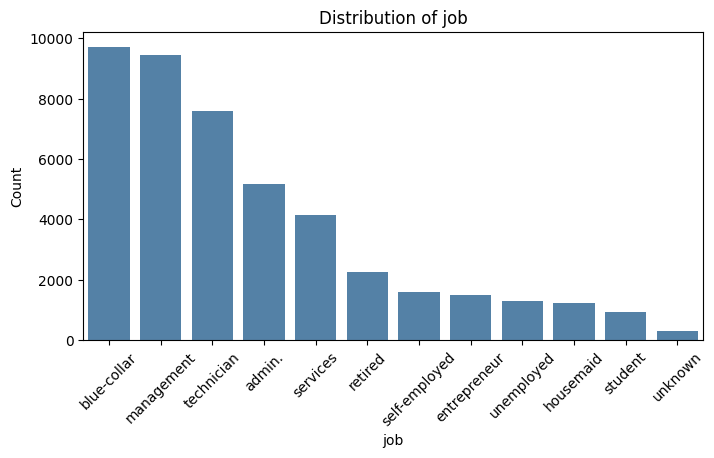

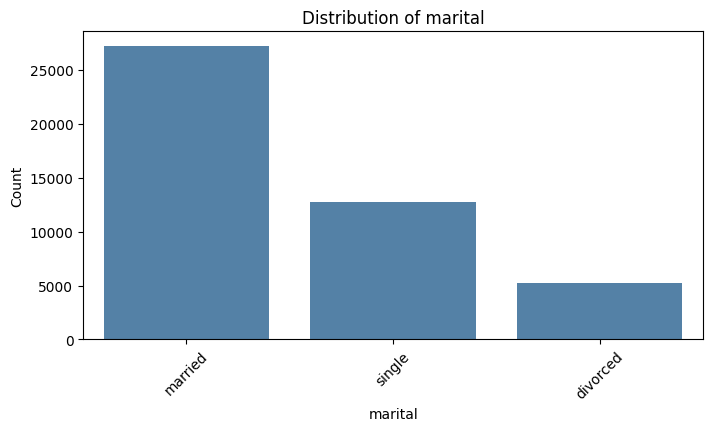

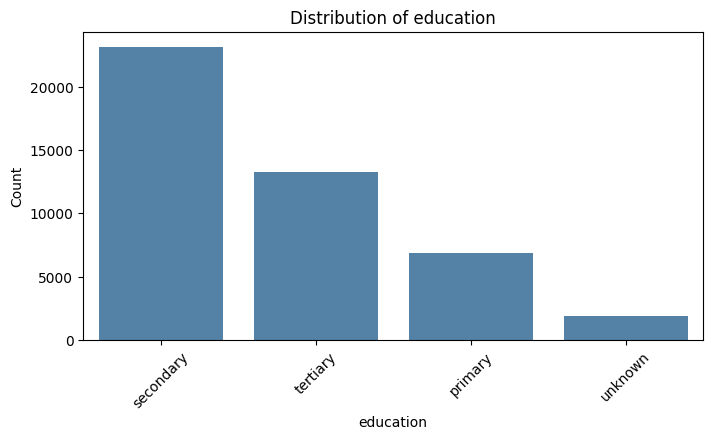

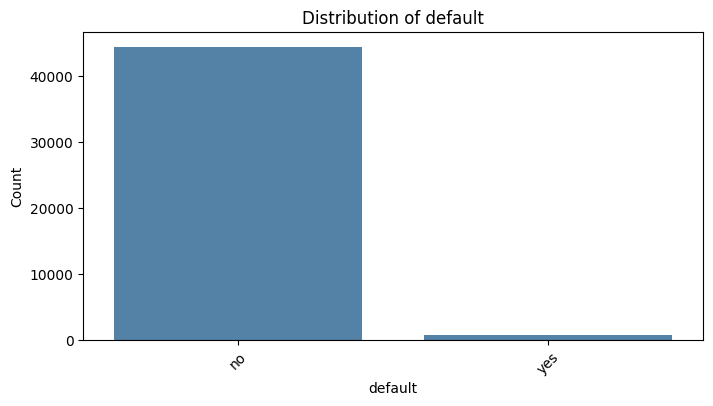

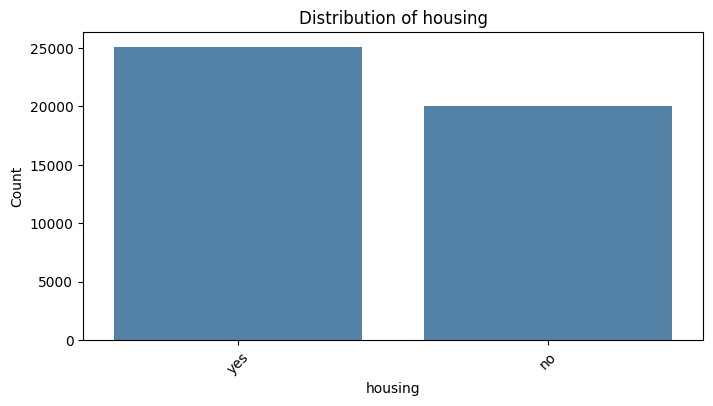

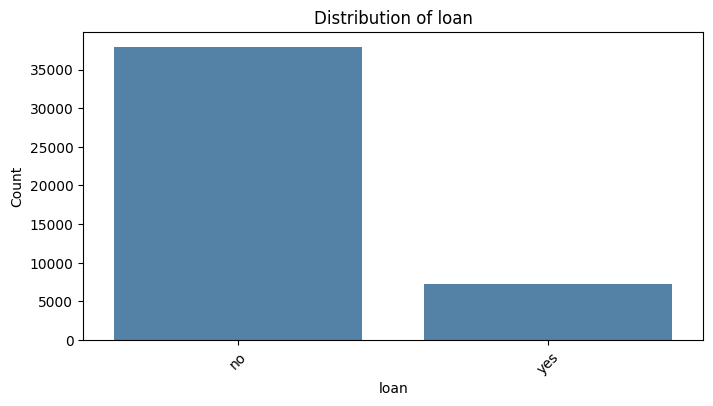

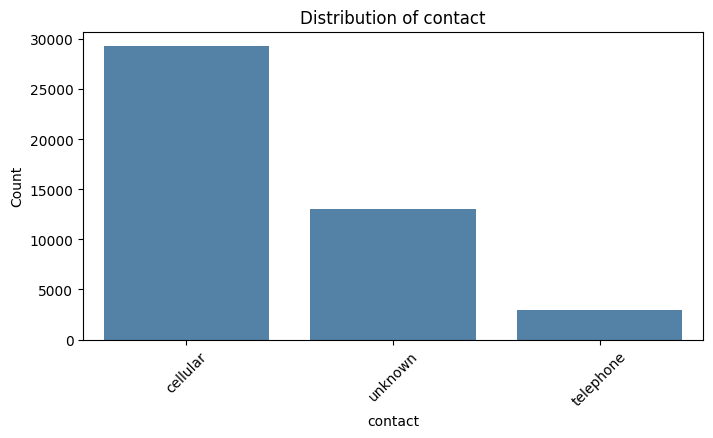

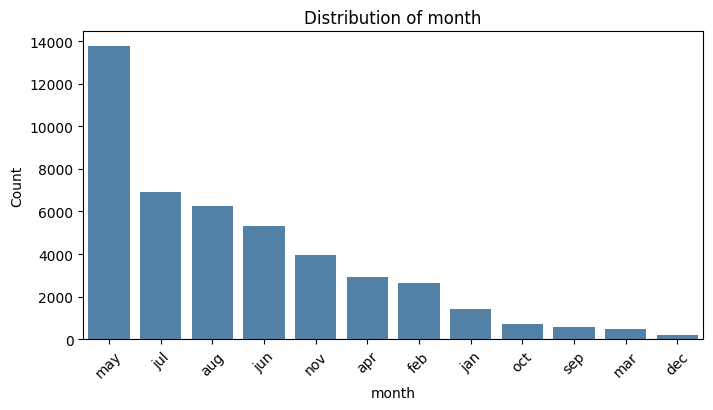

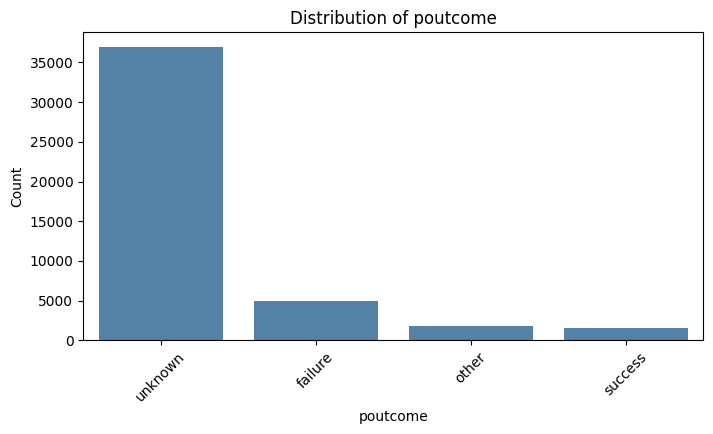

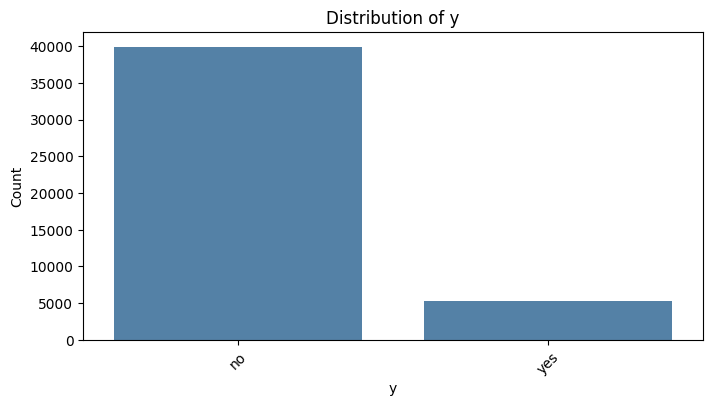

In [ ]:
# Visualizing the distribution of each categorical feature
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data_set, x=col, color="steelblue", order=data_set[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


6. Relationship between Categorical Features and target variable Y

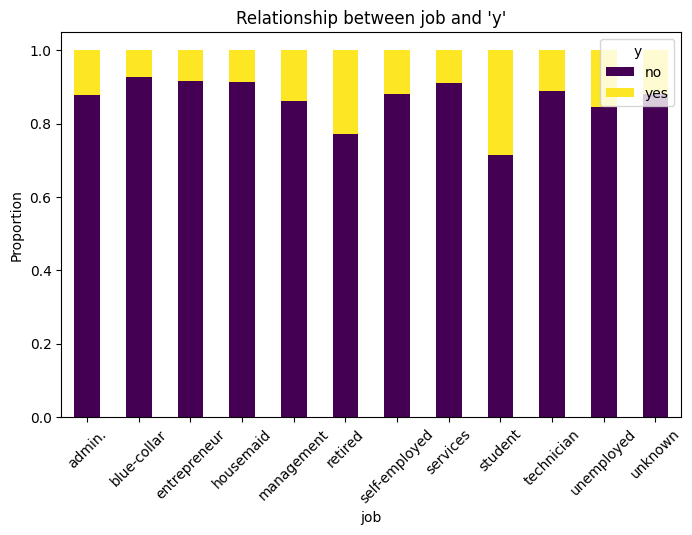

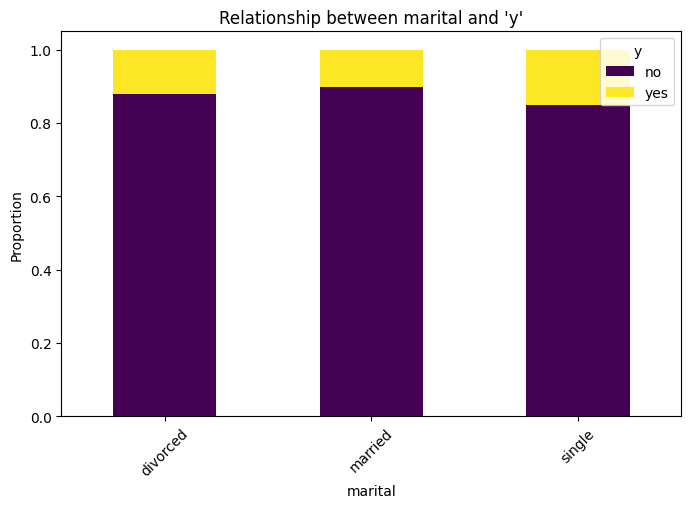

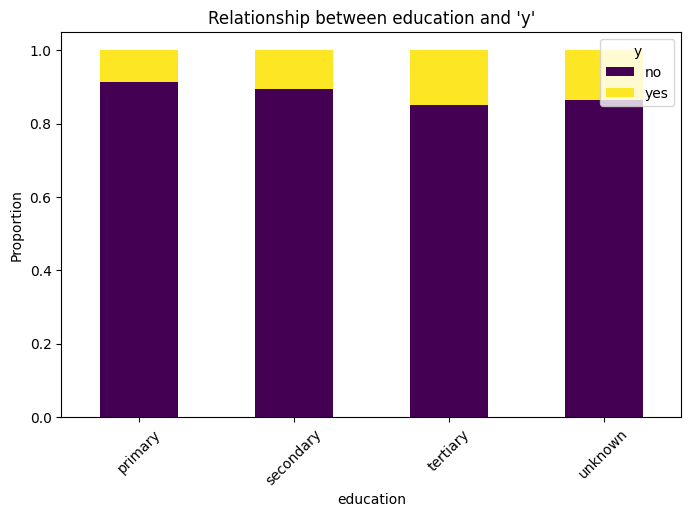

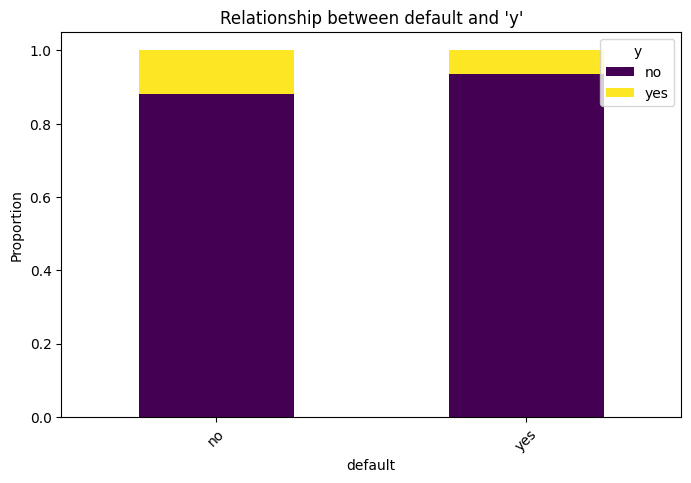

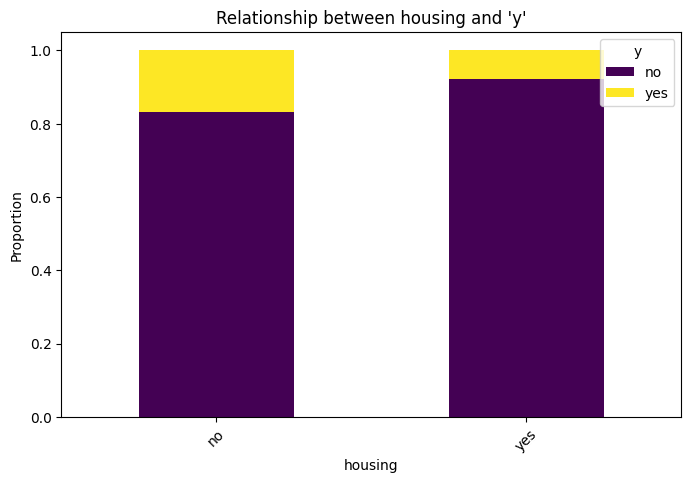

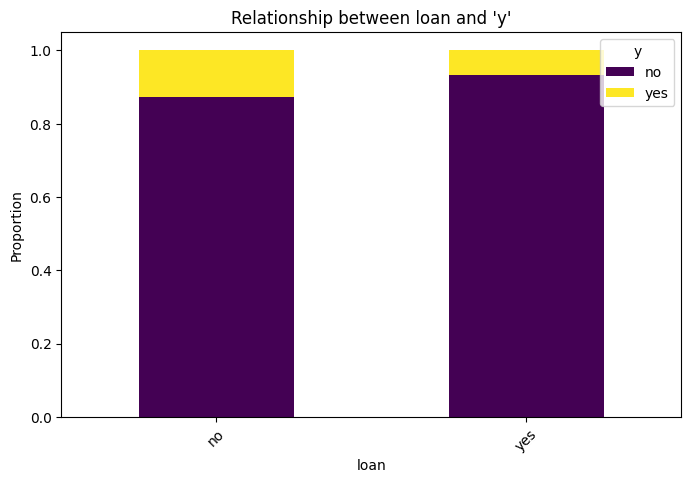

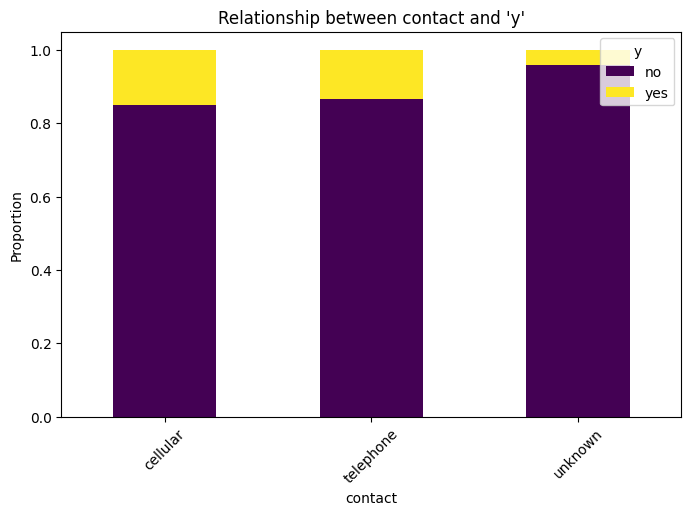

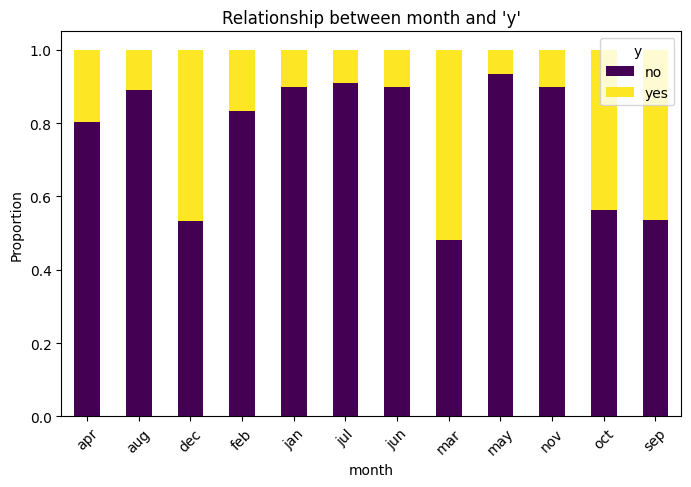

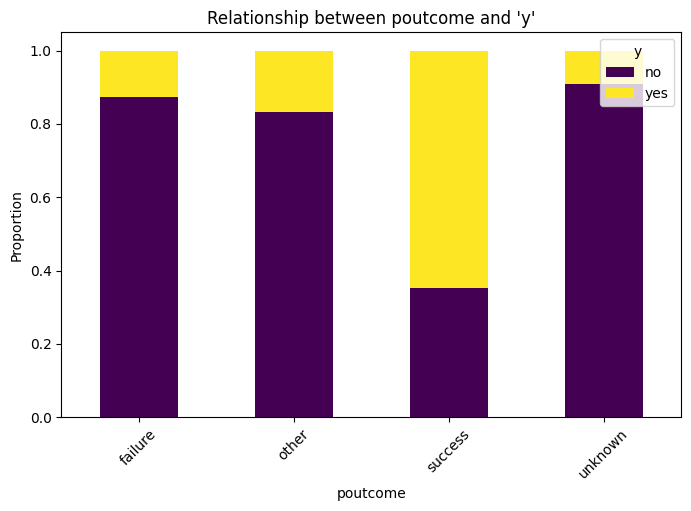

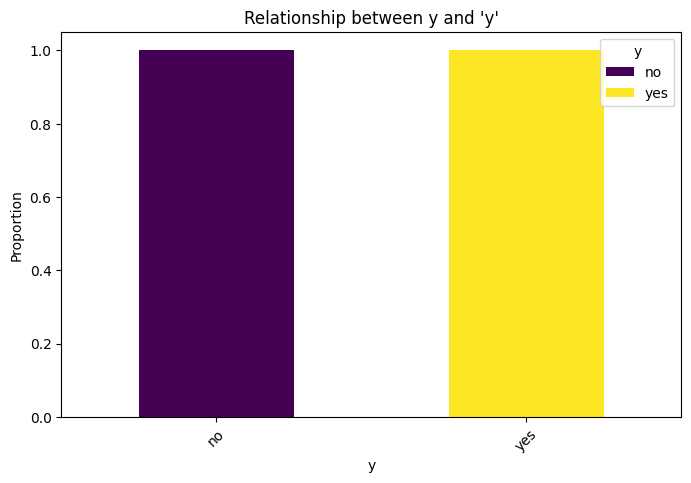

In [ ]:
# Visualize the relationship between categorical features and the target column 'y'
for col in categorical_features:
    crosstab = pd.crosstab(data_set[col], data_set['y'],normalize='index' )  # Normalize to show percentages
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap="viridis")
    plt.title(f"Relationship between {col} and 'y'")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title='y', loc="upper right")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


7. Explore the Numerical Features

In [ ]:
# List all numerical features
numerical_features = data_set.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")

data_set[numerical_features].head()

Numerical Features:


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


8. Find Discrete Numerical Features

In [ ]:
# Identify discrete numerical features (e.g., low unique values)
discrete_features = [col for col in numerical_features if data_set[col].nunique() < 20]
print("Discrete Numerical Features:", discrete_features)


Discrete Numerical Features: []


9. Relation between Discrete Numerical Features and Labels

In [ ]:
for col in discrete_features:
    print(f"\nRelationship between {col} and {'y'}:")
    print(data_set.groupby(col)['y'].mean())


10. Find Continuous Numerical Features

In [ ]:
# Continuous features have many unique values
continuous_features = [col for col in numerical_features if data_set[col].nunique() >= 20]
print("Continuous Numerical Features:", continuous_features)


Continuous Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


11. Distribution of Continuous Numerical Features and their outliers

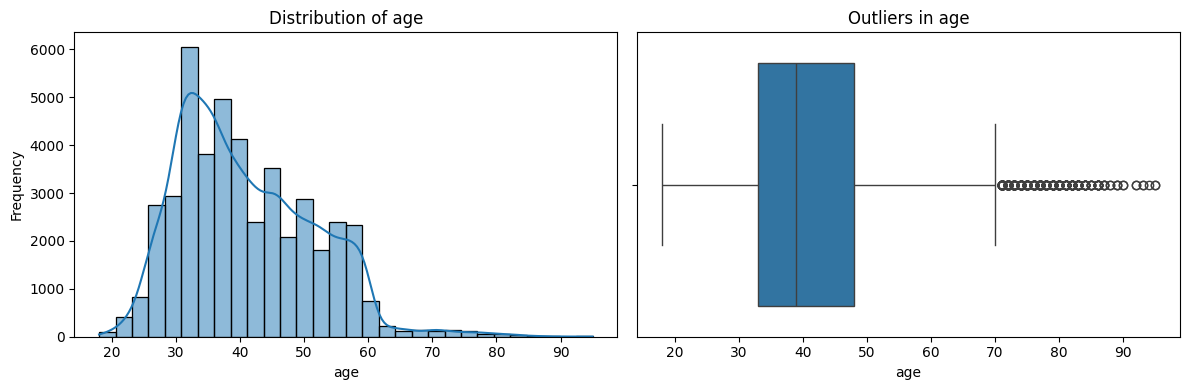

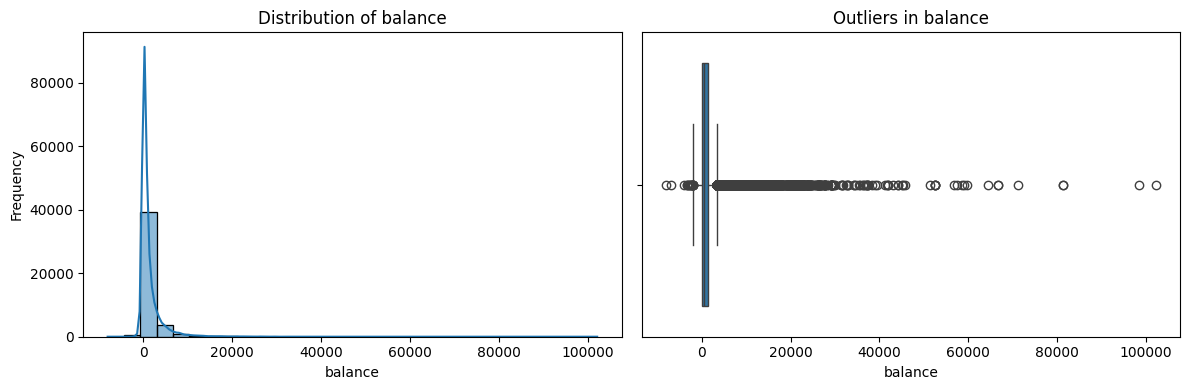

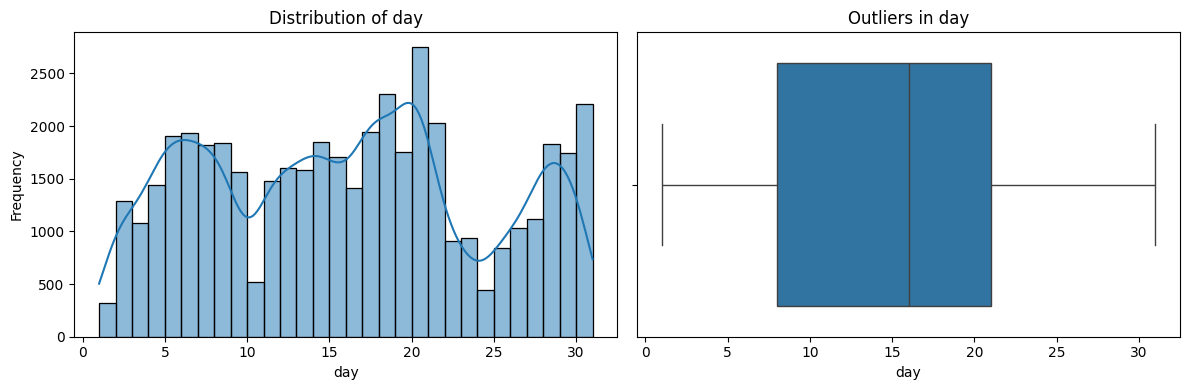

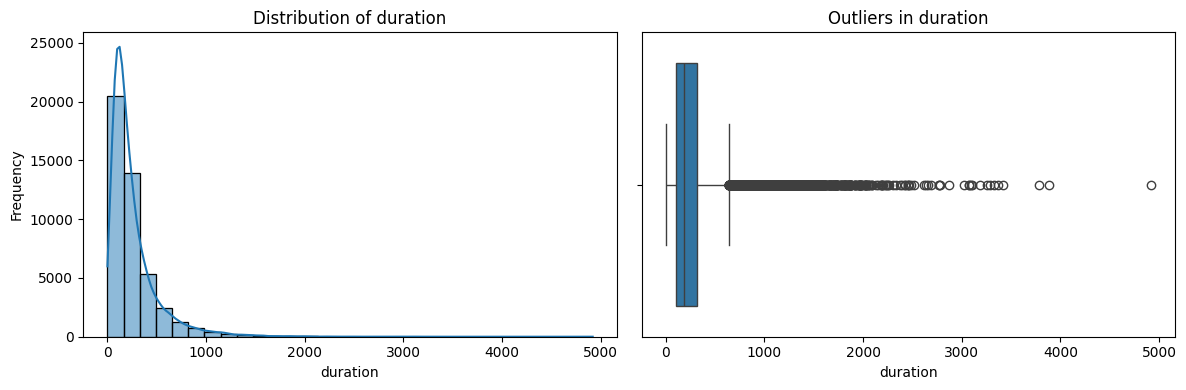

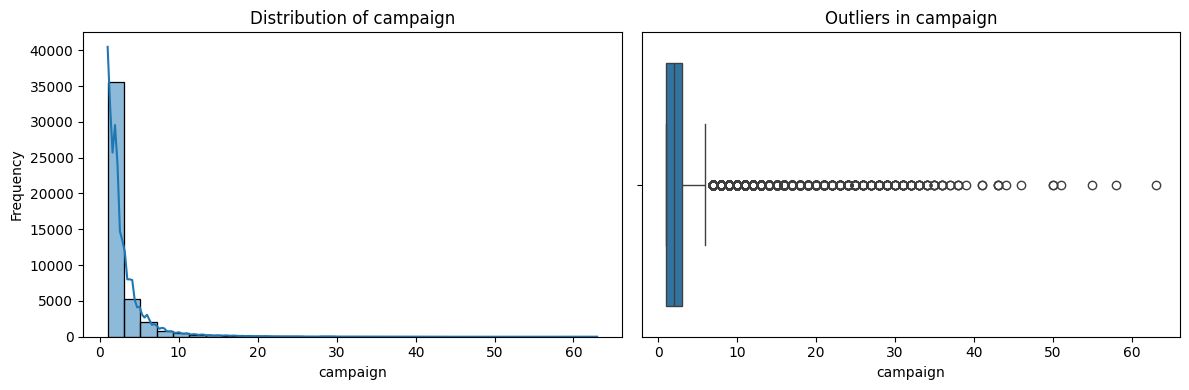

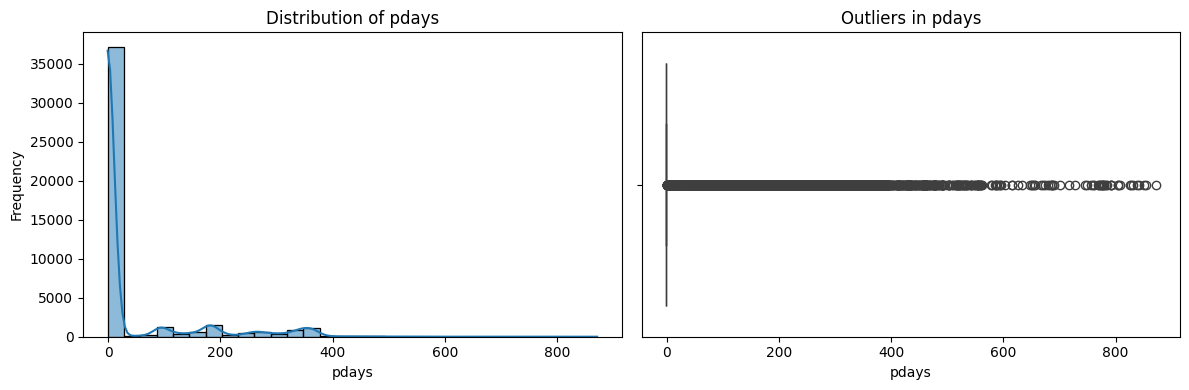

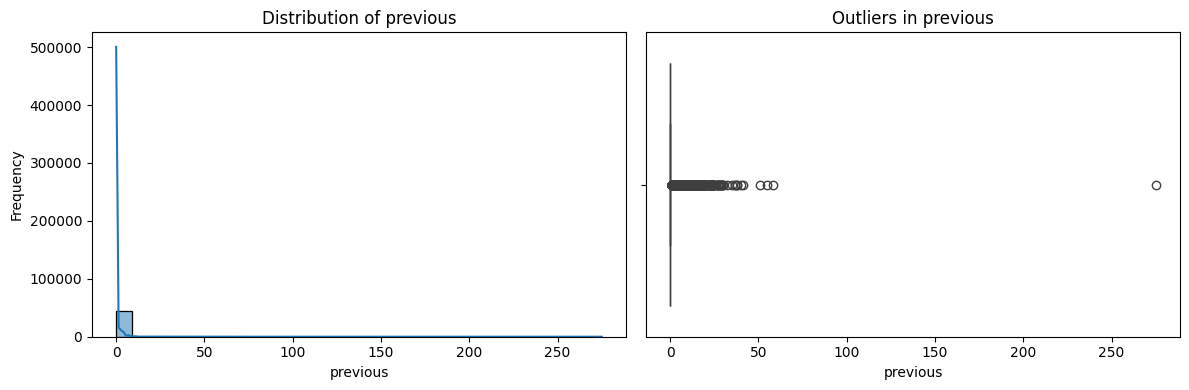

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through continuous features and numerical features
for col in continuous_features:  # Replace 'continuous_features' with your list of features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

    # Left plot: Histogram with KDE
    sns.histplot(data_set[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Right plot: Boxplot
    sns.boxplot(x=data_set[col], ax=axes[1])
    axes[1].set_title(f"Outliers in {col}")
    axes[1].set_xlabel(col)

    # Show the plots
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


14. Explore Correlation between Numerical Features

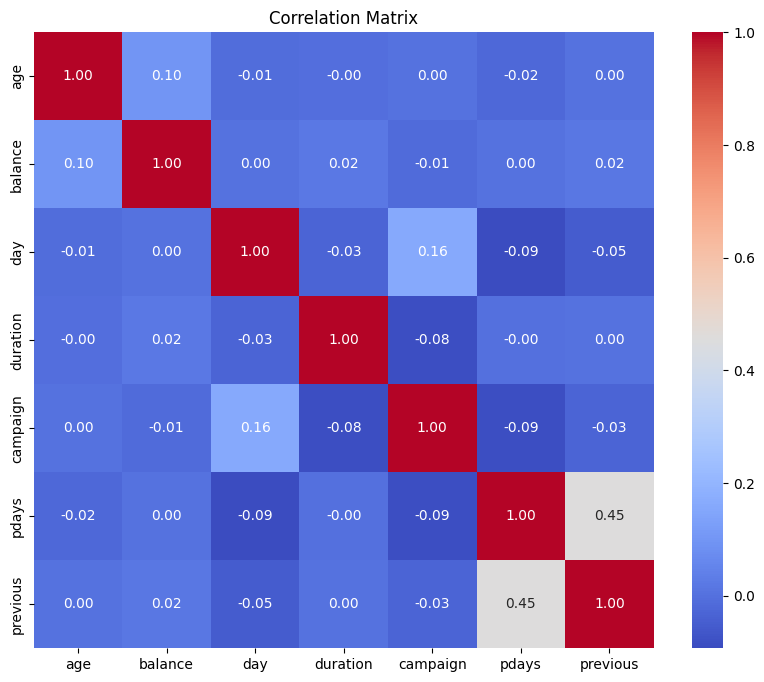

In [ ]:
# Compute correlation matrix
correlation_matrix = data_set[numerical_features].corr()

# Display correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


15. Find Pair Plot

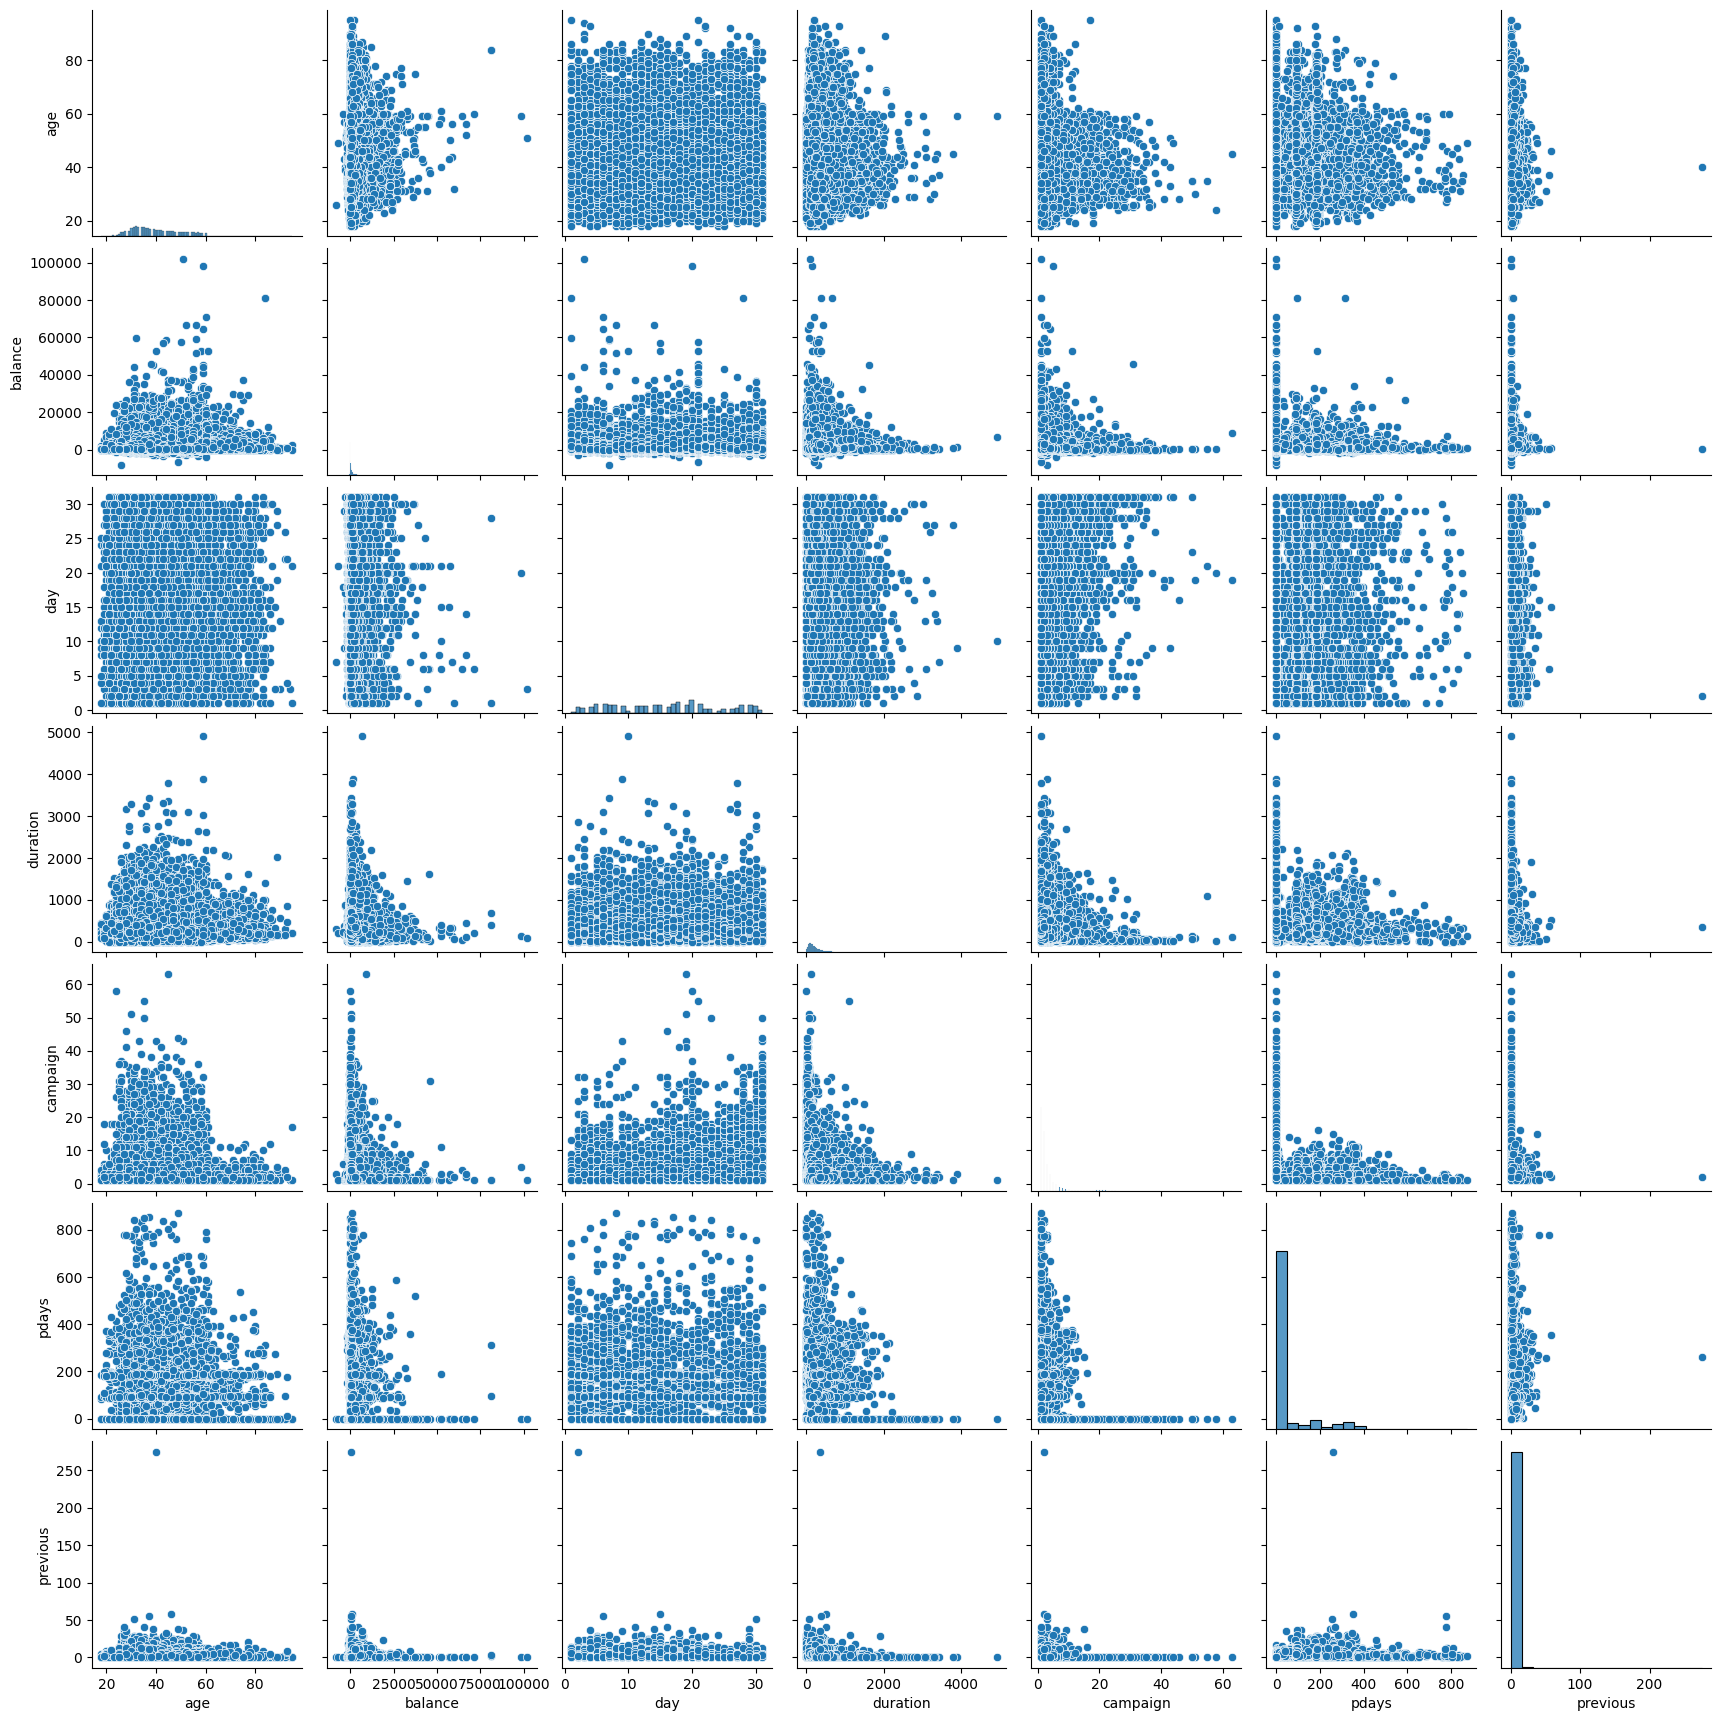

In [ ]:
# Pair plot for numerical features
sns.pairplot(data_set[numerical_features])
plt.show()


16. Check if Dataset is Balanced

Target value counts:
y
no     39922
yes     5289
Name: count, dtype: int64


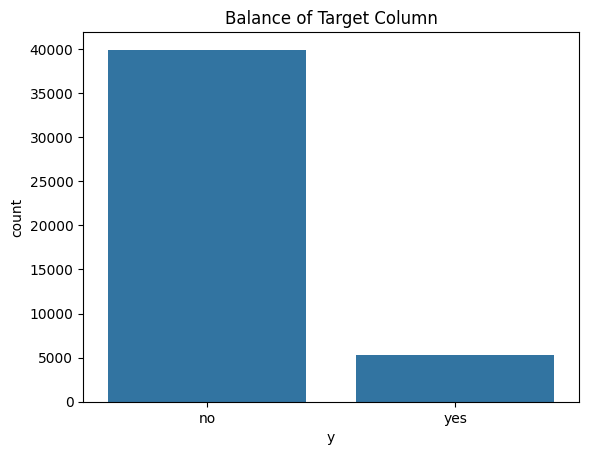

In [ ]:
# Check balance of target column
print("Target value counts:")
print(data_set['y'].value_counts())

# Visualize target balance
sns.countplot(x=data_set['y'])
plt.title("Balance of Target Column")
plt.show()


In [ ]:
data_set_2 = data_set.copy()

In [ ]:
# Removing any customer with 'unknown' job
data_set_2 = data_set_2[~data_set_2['job'].isin(['unknown'])].reset_index(drop=True)

In [ ]:
# Replace 'unknown' with 'other' in contact
data_set_2['contact'].replace(['unknown'], ['other'], inplace=True)

<ipython-input-104-00e75bae1955>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set_2['contact'].replace(['unknown'], ['other'], inplace=True)


In [ ]:
# Replace 'other' with 'unknown' in poutcome
data_set_2['poutcome'].replace(['other'], ['unknown'], inplace=True)

<ipython-input-105-57c357d50905>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set_2['poutcome'].replace(['other'], ['unknown'], inplace=True)


In [ ]:
data_set_2.shape

(44923, 17)

In [ ]:
data_set_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,other,5,may,92,1,-1,0,unknown,no
4,35,management,married,tertiary,no,231,yes,no,other,5,may,139,1,-1,0,unknown,no


In [ ]:
data_set_2.groupby(['y','default']).size()

y    default
no   no         38907
     yes          761
yes  no          5203
     yes           52
dtype: int64

In [ ]:
unwanted_features = ['default']  # Replace with the columns to be dropped
data_set_2 = data_set_2.drop(columns=unwanted_features, axis=1)
print(f"Dropped columns: {unwanted_features}")

Dropped columns: ['default']


In [ ]:
data_set_2.groupby(['y','pdays']).size()

y    pdays
no   -1       33333
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 912, dtype: int64

In [ ]:
unwanted_features = ['pdays']  # Replace with the columns to be dropped
data_set_2 = data_set_2.drop(columns=unwanted_features, axis=1)
print(f"Dropped columns: {unwanted_features}")

Dropped columns: ['pdays']


In [ ]:
# Encoding:
data_set_2['y']=data_set['y'].apply(lambda x: 0 if x=='no' else 1)
data_set_2['default']=data_set['default'].apply(lambda x: 0 if x=='no' else 1)
data_set_2['housing']=data_set['housing'].apply(lambda x: 0 if x=='no' else 1)
data_set_2['loan']=data_set['loan'].apply(lambda x: 0 if x=='no' else 1)

In [ ]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in cat_columns:
    # Perform one-hot encoding and convert to int64
    dummies = pd.get_dummies(data_set_2[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False).astype('int64')
    # Concatenate the encoded columns back to the DataFrame
    data_set_2 = pd.concat([data_set_2.drop(col, axis=1), dummies], axis=1)


In [ ]:
data_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44923 entries, 0 to 44922
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44923 non-null  int64
 1   balance              44923 non-null  int64
 2   housing              44923 non-null  int64
 3   loan                 44923 non-null  int64
 4   day                  44923 non-null  int64
 5   duration             44923 non-null  int64
 6   campaign             44923 non-null  int64
 7   previous             44923 non-null  int64
 8   y                    44923 non-null  int64
 9   default              44923 non-null  int64
 10  job_blue-collar      44923 non-null  int64
 11  job_entrepreneur     44923 non-null  int64
 12  job_housemaid        44923 non-null  int64
 13  job_management       44923 non-null  int64
 14  job_retired          44923 non-null  int64
 15  job_self-employed    44923 non-null  int64
 16  job_services         4

In [ ]:
data_set_2.head()

,age,balance,housing,loan,day,duration,campaign,previous,y,default,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,261,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,29,1,0,5,151,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2,1,1,5,76,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,1506,1,0,5,92,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,35,231,0,0,5,139,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data_set_2.tail()

,age,balance,housing,loan,day,duration,campaign,previous,y,default,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
44918,51,825,1,1,17,977,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
44919,71,1729,0,0,17,456,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
44920,72,5715,0,0,17,1127,5,3,0,0,...,0,0,0,0,0,1,0,0,1,0
44921,57,668,0,0,17,508,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1
44922,37,2971,1,0,17,361,2,11,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
data_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44923 entries, 0 to 44922
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44923 non-null  int64
 1   balance              44923 non-null  int64
 2   housing              44923 non-null  int64
 3   loan                 44923 non-null  int64
 4   day                  44923 non-null  int64
 5   duration             44923 non-null  int64
 6   campaign             44923 non-null  int64
 7   previous             44923 non-null  int64
 8   y                    44923 non-null  int64
 9   default              44923 non-null  int64
 10  job_blue-collar      44923 non-null  int64
 11  job_entrepreneur     44923 non-null  int64
 12  job_housemaid        44923 non-null  int64
 13  job_management       44923 non-null  int64
 14  job_retired          44923 non-null  int64
 15  job_self-employed    44923 non-null  int64
 16  job_services         4

In [ ]:
p_class1 = (data_set_2['y'].value_counts()/len(data_set_2))[0]                       # Calculate positive class's (1) proportion
p_class2 = (data_set_2['y'].value_counts()/len(data_set_2))[1]                       # Calculate negative class's (0) proportion


if p_class1<=0.4 or p_class2<=0.4:                                      # Print result
    print(f'y is imbalanced\n')
else:
    print(f'y is balanced\n')

if p_class1>p_class2:
    print(f"{(data_set_2['y'].unique())[0]} is majority, ({(data_set_2['y'].value_counts())[0]}) counts and it\'s Proportion = {round(p_class1*100)} %")
    print(f"{(data_set_2['y'].unique())[1]} is minority, ({(data_set_2['y'].value_counts())[1]}) counts and it\'s Proportion = {round(p_class2*100)} %")
else:
    print(f"{(data_set_2['y'].unique())[1]} is majority, ({(data_set_2['y'].value_counts())[1]}) counts and it\'s Proportion = {round(p_class2*100)} %")
    print(f"{(data_set_2['y'].unique())[0]} is minority, ({(data_set_2['y'].value_counts())[0]}) counts and it\'s Proportion = {round(p_class1*100)} %")


y is imbalanced

0 is majority, (39760) counts and it's Proportion = 89 %
1 is minority, (5163) counts and it's Proportion = 11 %


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data_set_2.drop('y', axis=1)  # All columns except the target column
y = data_set_2['y']  # Target column

# Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Combine the resampled data into a new balanced DataFrame (optional)
balanced_data_set_2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                 pd.DataFrame(y_resampled, columns=['y'])], axis=1)

# Display the first few rows of the balanced dataset
print(balanced_data_set_2.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:
y
0    39760
1    39760
Name: count, dtype: int64
   age  balance  housing  loan  day  duration  campaign  previous  default  \
0   58     2143        1     0    5       261         1         0        0   
1   44       29        1     0    5       151         1         0        0   
2   33        2        1     1    5        76         1         0        0   
3   47     1506        1     0    5        92         1         0        0   
4   35      231        0     0    5       139         1         0        0   

   job_blue-collar  ...  month_jul  month_jun  month_mar  month_may  \
0                0  ...          0          0          0          1   
1                0  ...          0          0          0          1   
2                0  ...          0          0          0          1   
3                1  ...          0          0          0          1   
4                0  ...          0          0          0          1   

   month_nov  month_oc

In [ ]:
# Resample the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(data_set_2.drop('y', axis=1), data_set_2['y'])

# Recreate the balanced dataset
data_set_2 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['y'])], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Check the class distribution
print(data_set_2['y'].value_counts())


y
0    39760
1    39760
Name: count, dtype: int64


In [ ]:
# Calculate proportions
p_class1 = (data_set_2['y'].value_counts() / len(data_set_2))[0]
p_class2 = (data_set_2['y'].value_counts() / len(data_set_2))[1]

# Check for balance
if abs(p_class1 - p_class2) <= 0.05:  # Adjust threshold if needed
    print(f'Target is balanced\n')
else:
    print(f'Target is still imbalanced\n')

# Print class details
if p_class1 > p_class2:
    print(f"{(data_set_2['y'].unique())[0]} is majority, ({(data_set_2['y'].value_counts())[0]}) counts and it\'s Proportion = {round(p_class1 * 100)} %")
    print(f"{(data_set_2['y'].unique())[1]} is minority, ({(data_set_2['y'].value_counts())[1]}) counts and it\'s Proportion = {round(p_class2 * 100)} %")
else:
    print(f"{(data_set_2['y'].unique())[1]} is majority, ({(data_set_2['y'].value_counts())[1]}) counts and it\'s Proportion = {round(p_class2 * 100)} %")
    print(f"{(data_set_2['y'].unique())[0]} is minority, ({(data_set_2['y'].value_counts())[0]}) counts and it\'s Proportion = {round(p_class1 * 100)} %")


Target is balanced

1 is majority, (39760) counts and it's Proportion = 50 %
0 is minority, (39760) counts and it's Proportion = 50 %


Target value counts:
y
0    39760
1    39760
Name: count, dtype: int64


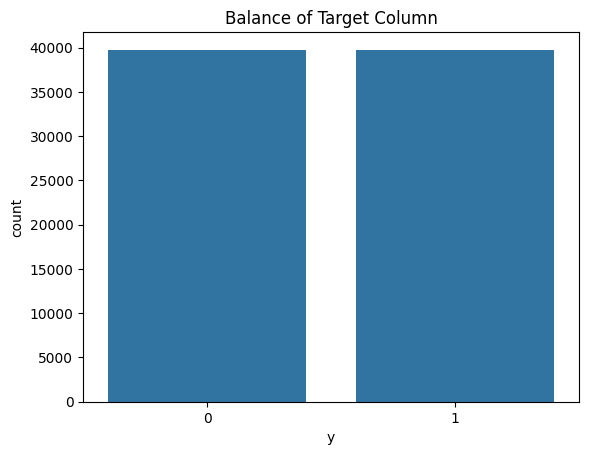

In [ ]:
# Check balance of target column
print("Target value counts:")
print(data_set_2['y'].value_counts())

# Visualize target balance
sns.countplot(x=data_set_2['y'])
plt.title("Balance of Target Column")
plt.show()


In [ ]:
target = 'y'                          # Store 'deposit' in target variable
Y = data_set_2[target]                              # Define target
X = data_set_2.drop(columns=[target])

In [ ]:
# Split data into 80 % train set and 20 % test set, also spread the target values evenly between train set and test set using stratify=y
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify= Y)